# **Projet 6 : Classifiez automatiquement des biens de consommation**

## **Analyse Textuelle**

#### **Librairies**

In [ ]:
# pip install umap-learn

In [ ]:
# Import des librairies de base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Librairies d'affichage des tokens
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk
from tqdm import tqdm

# Clustering et reduction de dimensions
import time
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.decomposition import TruncatedSVD
# from umap import UMAP
from sklearn.preprocessing import LabelEncoder
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
# Comptage simple de mots
from sklearn.feature_extraction.text import CountVectorizer

####**Chargement du dataset**

In [ ]:
# Conncter le drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Notre de travail dossier
chemin = r"/content/gdrive/MyDrive/Colab Notebooks/Projet_OPC/P6_Classification_automatiquement_des_biens/data"

# Nos fichiers
os.listdir(chemin)

['flipkart_com-ecommerce_sample_1050.csv', 'data_propre.csv', 'Flipkart']

In [ ]:
dir = os.chdir('/content/gdrive/MyDrive/Colab Notebooks/Projet_OPC/P6_Classification_automatiquement_des_biens/data')

In [ ]:
# Chargons le jeu de données
data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


#### **Exploration du jeu de données**

In [ ]:
# Sur les 5 premiers individus
data.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [ ]:
# Sur les 5 derniers individus
data.tail(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZGFD3RCE,3465.0,1333.0,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,False,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1049,f2f027ad6a6df617c9f125173da71e44,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-large-vinyl-s...,Uberlyfe Large Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE2ZEPACRQJKH7,1190.0,595.0,f2f027ad6a6df617c9f125173da71e44.jpg,False,Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...,4,4,Uberlyfe,"{""product_specification""=>[{""key""=>""Sales Pack..."


In [ ]:
# Sur un échantillon de 20 individus
data.sample(20)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
261,273982a65b9c7dabe56c8345552bfad7,2015-12-01 12:40:44 +0000,http://www.flipkart.com/pristine-hard-anodised...,Pristine Hard Anodised Kadhai 2 L,"[""Kitchen & Dining >> Cookware >> Pots & Pans ...",PTPE7FFJTHJDMDB5,1260.0,899.0,273982a65b9c7dabe56c8345552bfad7.jpg,False,Pristine Hard Anodised Kadhai 2 L (Aluminium)\...,No rating available,No rating available,Pristine,"{""product_specification""=>[{""key""=>""Pan Type"",..."
43,2d50e4c6ccf8befe9335ac8f97a11712,2016-03-20 14:44:44 +0000,http://www.flipkart.com/burt-s-bees-hair-repai...,Burt s Bees Hair Repair Shea And Grapefruit De...,"[""Beauty and Personal Care >> Hair Care >> Con...",CNDEGVE65UWDPCYC,2712.0,1248.0,2d50e4c6ccf8befe9335ac8f97a11712.jpg,False,Key Features of Burt s Bees Hair Repair Shea A...,No rating available,No rating available,Burt s Bees,"{""product_specification""=>[{""key""=>""Hair Condi..."
454,7cb1ea7b2257aeeeba701a8f6e3e0127,2015-12-03 21:49:05 +0000,http://www.flipkart.com/milton-opaque-series-6...,Milton Opaque Series 630 ml Water Bottle,"[""Kitchen & Dining >> Containers & Bottles >> ...",WBTE6NV5KGNNHHUZ,158.0,150.0,7cb1ea7b2257aeeeba701a8f6e3e0127.jpg,False,Flipkart.com: Buy Milton Opaque Series 630 ml ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Series"", ""..."
308,521528ccaa29dd645e869550cae7a249,2015-12-01 06:13:00 +0000,http://www.flipkart.com/ravishing-variety-stat...,Ravishing Variety Statue Showpiece - 17 cm,"[""Home Decor & Festive Needs >> Showpieces >> ...",SHIEA6YUJYA5MF7J,799.0,500.0,521528ccaa29dd645e869550cae7a249.jpg,False,Buy Ravishing Variety Statue Showpiece - 17 ...,No rating available,No rating available,Ravishing Variety,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
244,0c4718ae90f2889b7021a99ee1cc106c,2015-12-01 12:40:44 +0000,http://www.flipkart.com/bergner-kadhai-na-l/p/...,Bergner Kadhai NA L,"[""Kitchen & Dining >> Cookware >> Pots & Pans ...",PTPECA2QYCZH8MBV,1499.0,1499.0,0c4718ae90f2889b7021a99ee1cc106c.jpg,False,"Bergner Kadhai NA L (Aluminium, Non-stick)\r\n...",No rating available,No rating available,Bergner,"{""product_specification""=>[{""key""=>""Pan Type"",..."
968,634c89325a6c7752985a74a67f985c1f,2016-05-26 12:20:35 +0000,http://www.flipkart.com/sparklings-cotton-chec...,Sparklings Cotton Checkered Double Bedsheet,"[""Baby Care >> Baby Bedding >> Baby Bedsheets ...",BDSEGZCETASFKSBF,1199.0,549.0,634c89325a6c7752985a74a67f985c1f.jpg,False,Key Features of Sparklings Cotton Checkered Do...,No rating available,No rating available,Sparklings,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
609,08bdf59c9dcb241e3a57eb4f3729ec70,2016-03-07 19:42:22 +0000,http://www.flipkart.com/rrsskids-swing-king-co...,Rrsskids Swing King Cotton Hammock,"[""Home Decor & Festive Needs >> Garden & Leisu...",HKSEFHYXHEBSYZR6,5000.0,4200.0,08bdf59c9dcb241e3a57eb4f3729ec70.jpg,False,Key Features of Rrsskids Swing King Cotton Ham...,No rating available,No rating available,Rrsskids,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
769,8aa19c1f26ee1f256d4c3ab5f2f849be,2015-12-12 11:46:53 +0000,http://www.flipkart.com/xemex-st1025sl07-new-g...,Xemex ST1025SL07 New Generation Analog Watch ...,"[""Watches >> Wrist Watches >> Xemex Wrist Watc...",WATE6KYGHHMDFFMK,650.0,275.0,8aa19c1f26ee1f256d4c3ab5f2f849be.jpg,False,Xemex ST1025SL07 New Generation Analog Watch ...,5,5,NaN,"{""product_specification""=>[{""key""=>""Chronograp..."
585,a70ea60f971825b2eb57261029f317ec,2016-01-07 05:50:25 +0000,http://www.flipkart.com/flippd-fdrbb1614-fibre...,Flippd FDRBB1614 Fibre Analog Watch - For Men,"[""Watches >> Wrist Watches >> Flippd Wrist Wat...",WATEYUZXWKUESAYZ,750.0,750.0,a70ea60f971825b2eb57261029f317ec.jpg,True,Flippd FDRBB1614 Fibre Analog Watch - For Men...,3.6,3.6,Na

##### **Structure du dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

**La base de données "flipkart_com-ecommerce" contient 1050 produits avec leurs descriptions et leurs images associées**

**Les types de colonnes**

In [ ]:
data.dtypes.value_counts()

,count
object,12
float64,2
bool,1


**Le nombre de valeurs unique par variables**

In [ ]:
data.nunique().sort_values(ascending=False)

,0
uniq_id,1050
product_url,1050
product_name,1050
pid,1050
image,1050
description,1050
product_specifications,984
product_category_tree,642
brand,490
discounted_price,424


Sur les **1050** lignes de notre dataset, il n y a que **642 product_category_tree différents**.

On peut dire que cette vraiable référence notre **Document** et lensemble des texte presents dans colonne constitue le **corpus**.

##### **Valeurs nulles et Doublons**

In [ ]:
data.isna().sum().sort_values()

,0
uniq_id,0
crawl_timestamp,0
product_url,0
product_name,0
product_category_tree,0
pid,0
image,0
is_FK_Advantage_product,0
description,0
product_rating,0


**Les valeurs dupliquées**

In [ ]:
data.duplicated().sum()

0

Pas de lignes qui soient plusieurs fois la même mais ce qui nous interesse ici est de voir s'il extste des textes dupliquées.

In [ ]:
for col in data.columns:
    n = data[col].duplicated().sum()
    print(f"{col} : {n} doublons")

uniq_id : 0 doublons
crawl_timestamp : 901 doublons
product_url : 0 doublons
product_name : 0 doublons
product_category_tree : 408 doublons
pid : 0 doublons
retail_price : 695 doublons
discounted_price : 625 doublons
image : 0 doublons
is_FK_Advantage_product : 1048 doublons
description : 0 doublons
product_rating : 1023 doublons
overall_rating : 1023 doublons
brand : 559 doublons
product_specifications : 65 doublons


Prenons la variable **"product_category_tree"** et regardons les lignes où elle dupliquée. On garde la 1ère s'il y a deux lignes dupliquées.

In [ ]:
idx = data.duplicated(subset='product_category_tree', keep = 'first')
data.loc[idx, :].sort_values(by='product_category_tree')

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
1049,f2f027ad6a6df617c9f125173da71e44,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-large-vinyl-s...,Uberlyfe Large Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE2ZEPACRQJKH7,1190.0,595.0,f2f027ad6a6df617c9f125173da71e44.jpg,False,Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...,4,4,Uberlyfe,"{""product_specification""=>[{""key""=>""Sales Pack..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZGFD3RCE,3465.0,1333.0,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,False,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1044,be0f39341d771aac57084970f1ed6425,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5UYBHF4MXU,1429.0,1143.0,be0f39341d771aac57084970f1ed6425.jpg,False,Buy Wallmantra Medium Vinyl Stickers Sticker f...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
774,093bcad64d11c0aed903a8dd787ef069,2015-12-12 11:46:53 +0000,http://www.flipkart.com/offspring-embroidered-...,"Offspring Embroidered, Solid Single Wrapper Wh...","[""Baby Care >> Baby Bedding >> Baby Blankets >...",BLAE8B5G4GWTBEEH,399.0,310.0,093bcad64d11c0aed903a8dd787ef069.jpg,False,"Offspring Embroidered, Solid Single Wrapper Wh...",No rating available,No rating available,Offspring,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,d98147c96d2eebf723b2b67d791bcdaa,2016-01-07 05:50:25 +0000,http://www.flipkart.com/timewel-1100-n2017-ana...,Timewel 1100-N2017 Analog Watch - For Women,"[""Watches >> Wrist Watches >> Timewel Wrist Wa...",WATECKYXXHUYCHQZ,795.0,795.0,d98147c96d2eebf723b2b67d791bcdaa.jpg,False,Timewel 1100-N2017 Analog Watch - For Women -...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp..."
588,156bcd3aba1838a2b6bad856654db964,2016-01-07 05:50:25 +0000,http://www.flipkart.com/timewel-n1536-gw-1-ana...,Timewel N1536(GW)_1 Analog Watch - For Men,"[""Watches >> Wrist Watches >> Timewel Wrist Wa...",WATEYAP3S3TD5EMR,855.0,855.0,156bcd3aba1838a2b6bad856654db964.jpg,False,Timewel N1536(GW)_1 Analog Watch - For Men - ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Mechanism""..."
554,b144a363c107c7bdd91f32d6e28ba6f2,2016-01-07 05:50:25 +0000,http://www.flipkart.com/timewel-1100-n1192-ana...,Timewel 1100-N1192 Analog Watch - For Men,"[""Watches >> Wrist Watches >> Timewel Wrist Wa...",WATEYAP38HHARJDT,995.0,995.0,b144a363c107c7bdd91f32d6e28ba6f2.jpg,False,Timewel 1100-N1192 Analog Watch - For Men - B...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Mechanism""..."
583,35a68b44bef47a809314493d28535b9d,2016-01-07 05:50:25 +0000,http://www.flipkart.com/timewel-1100-n1944-b-a...,Timewel 1100-N1944_B Analog Watch - For Women,"[""Watches >> Wrist Watches >> Timewel Wrist Wa...",WATE2FAGESM5B5VZ,855.0,855.0,35a68b44bef47a809314493d28535b9d.jpg

#### **Statistique des données**

In [ ]:
data.describe(include=np.number)

,retail_price,discounted_price
count,1049.000000,1049.000000
mean,2186.197331,1584.527169
std,7639.229411,7475.099680
min,35.000000,35.000000
25%,555.000000,340.000000
50%,999.000000,600.000000
75%,1999.000000,1199.000000
max,201000.000000,201000.000000


In [ ]:
data.describe(include=object).T

,count,unique,top,freq
uniq_id,1050,1050,55b85ea15a1536d46b7190ad6fff8ce7,1
crawl_timestamp,1050,149,2015-12-01 12:40:44 +0000,150
product_url,1050,1050,http://www.flipkart.com/elegance-polyester-mul...,1
product_name,1050,1050,Elegance Polyester Multicolor Abstract Eyelet ...,1
product_category_tree,1050,642,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",56
pid,1050,1050,CRNEG7BKMFFYHQ8Z,1
image,1050,1050,55b85ea15a1536d46b7190ad6fff8ce7.jpg,1
description,1050,1050,Key Features of Elegance Polyester Multicolor ...,1
product_rating,1050,27,No rating available,889
overall_rating,1050,27,No rating available,889


Il existe ici un catégorie de **"product_category_tree"** référencé **56 fois**

### **Analyse des descriptions textuelles**

#### **Fonction pour le prétraitement des données**

Téléchargeant des données essentielles pour le nettoyage et la préparation de du texte avant de l'analyser.

In [ ]:
# Liste des mots très courants en anglais
nltk.download('stopwords')
# WordNet, une grande base de données lexicale de l'anglais.
# Nous allons l'utilise plus loin dans notre code pour l'analyse sémantique et la lemmatisation.
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Affichge des tokens
def display_tokens_info(tokens):
    """display token info"""
    print(f"nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}")
    print(tokens[:20])


####################################################################################
# Tokenizer
def tokenizer_fct(sentence):
    # print(sentence)
    tokenizer = RegexpTokenizer(r"[a-zA-Z]+")
    word_tokens = tokenizer.tokenize(sentence)
    return word_tokens

####################################################################################

# La liste stop words. La langue est ici l'anglais
stop_w = list(set(stopwords.words('english')))

def stop_word_filter_fct(list_words):
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

####################################################################################
# on transformen les mots en miniscule et alpha

def lower_start_fct(list_words):
    lw = [w.lower() for w in list_words]
    return lw

####################################################################################
# Reduire les erreurs sur la racine des mots avec Lemmatizer
def lemma_fct(list_words):
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# stemming
def stemma_fct(list_words):
    stemmer = PorterStemmer()
    stem_w = [stemmer.stem(w) for w in list_words]
    return stem_w

####################################################################################
# liste des mots non informatifs
def lst_non_informative(corpus,
                        stem_or_lem='lem',
                        thres_com=10):
    """basic function of text processing"""
    corpus_raw = "".join(corpus.values)
    word_tokens = tokenizer_fct(corpus_raw)
    lw = lower_start_fct(word_tokens)
    sw = stop_word_filter_fct(lw)

    if stem_or_lem == 'lem':
        trans = lemma_fct(sw)
    else:
        trans = stemma_fct(sw)

    # unique word
    tmp = pd.Series(trans).value_counts()
    list_unique_words = tmp[tmp == 1].reset_index()
    # common words
    list_common_words = tmp.head(thres_com).reset_index()
    # non informative words
    non_informative_words = pd.concat(
        [list_common_words['index'], list_unique_words['index']], ignore_index=True).to_list()

    return non_informative_words

####################################################################################
# On filtre les mots non informatifs
def no_info_word_filter_fct(list_words, non_info_word):
    filtered_w = [w for w in list_words if not w in non_info_word]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

####################################################################################
# Fonction de préparation du texte pour le bag of words avec lemm ou stemming
def transform_bow_fct(desc_text, non_info_word, stem_or_lem='lem', rejoin=True):
    word_tokens = tokenizer_fct(desc_text)
    lw = lower_start_fct(word_tokens)
    sw = stop_word_filter_fct(lw)

    if stem_or_lem == 'lem':
        st_lem_w = lemma_fct(sw)
    else:
        st_lem_w = stemma_fct(sw)

    filt = no_info_word_filter_fct(st_lem_w, non_info_word)

    if rejoin:
        return " ".join(filt)

    return filt

#### **Fonction pour la création de features et Clustering**

In [ ]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length):
    """ Cette fonction permet de préparer les phrases afin d'appliquer le modèle d'embedding BERT"""

    input_ids = []
    token_type_ids = []
    attention_mask = []
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens=True,
                                              max_length=max_length,
                                              padding='max_length',
                                              return_attention_mask=True,
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf",
                                              verbose=False)

        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0],
                             bert_inp['token_type_ids'][0],
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)

    return input_ids, token_type_ids, attention_mask, bert_inp_tot

####################################################################################

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF'):
    """ Cette fonction permet de préparer les phrases afin d'appliquer le modèle d'embedding BERT"""

    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in tqdm(range(len(sentences)//batch_size)):
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size],
                                                                               bert_tokenizer, max_length)

        if mode == 'HF':    # Bert HuggingFace
            outputs = model.predict(
                [input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred, verbose=False)
            last_hidden_states = outputs.last_hidden_state

        if mode == 'TFhub':  # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids": input_ids,
                                 "input_mask": attention_mask,
                                 "input_type_ids": token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']

        if step == 0:
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else:
            last_hidden_states_tot = np.concatenate(
                (last_hidden_states_tot, last_hidden_states))

    features_bert = np.array(last_hidden_states_tot).mean(axis=1)

    time2 = np.round(time.time() - time1, 0)
    print("temps traitement : ", time2)

    return features_bert, last_hidden_states_tot

####################################################################################
def feature_USE_fct(sentences, b_size):
    """ Cette fonction permet d'appliquer le modèle de sentence embedding USE """

    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size):
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step == 0:
            features = feat
        else:
            features = np.concatenate((features, feat))

    time2 = np.round(time.time() - time1, 0)
    print("temps traitement : ", time2)

    return features

##### **Réduction de dimensiosn et clustering**

In [ ]:
#
def select_n_components(features, goal_var: float) -> int:
    """
    La méthode PCA de sklearn permet de selectionner un float en n_compoents afin de ne garder que 0.99 (par ex) de la variance totale mais cela n'est pas possible pour la méthode SVD.
    Cette function permet de récupérer le nombre de composantes expliquant X%  de la variance totale par la méthode de réduction SVD.
    """

    # Création et fit du modèle
    tsvd = TruncatedSVD(n_components = features.shape[1]-1)
    tsvd.fit(features)
    tsvd_var_ratios = tsvd.explained_variance_ratio_

    # Initialisation
    total_variance = 0.0
    n_components = 0

    # boucle pour avoir le nombre de composante expliquant goal_var variance :
    for explained_variance in tsvd_var_ratios:

        # somme de la variance expliquée par itération
        total_variance += explained_variance

        # Nb composantes +1 par itération
        n_components += 1

        # Si la variance totale > objectifs
        if total_variance >= goal_var:
            # Arrêt de la boucle
            break

    # Return the number of components
    return n_components

####################################################################################

# Calcul Reduction, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters

def reduction_fct(features, reduc='SVD'):
    """ Cette fonction permet de réduire et clusteriser des données
    avec le choix de l'algorithme de réduction dans les arguments : SVD, UMAP ou TSNE
    """

    if reduc == 'SVD':
        n_comp = select_n_components(features, goal_var=0.99)
        print(f"Nombre de dimensions avant TSVD: {features.shape[1]}")
        print(
            f"Nombre de dimensions aprés TSVD (99% var. expliquée): {n_comp}")
        modelSVD = TruncatedSVD(n_components=n_comp, random_state=42)
        reduc_X = modelSVD.fit_transform(features)
        return reduc_X

    elif reduc == 'TSNE':
        tsne = TSNE(n_components=2, perplexity = 30, n_iter = 2000,
                    init='random', learning_rate = 200, random_state=42)
        reduc_X = tsne.fit_transform(features)
        return reduc_X

    elif reduc == 'UMAP':
        modelUMAP = UMAP(n_neighbors=200,
                         min_dist=1,
                         n_components=2,
                         random_state=42)
        reduc_X = modelUMAP.fit_transform(features)
        return reduc_X

    else:
        print("please select 'SVD' (PCA equivalent for sparse data),'TSNE' or 'UMAP'")

####################################################################################
def kmeans_fct(features, y_categ):
    """ Fonction permettant de réaliser un kmeans et de calculer l'ARI entre les vrais labels et les labels prédits"""
    # Détermination des clusters à partir des données après Tsne
    num_labels = len(set(y_categ))
    cls = KMeans(n_clusters = num_labels, n_init=100, random_state=42)
    cls.fit(features)
    ARI = np.round(adjusted_rand_score(y_categ, cls.labels_), 4)
    print("ARI : ", ARI)

    return ARI, cls.labels_


####################################################################################
def reduc_visu_fct(reduc_X, target, labels):
    """visualisation des axes réduits (2 premiers) selon les vraies catégories et selon les clusters"""
    # Encodage des targets pour la couleur des clusters
    LE = LabelEncoder()
    y_categ = LE.fit_transform(target)
    categ = list(set(target))

    # représentation graphique
    fig = plt.figure(figsize=(20, 8))

    ax = fig.add_subplot(121)
    scatter = ax.scatter(reduc_X[:, 0], reduc_X[:, 1], c = y_categ, cmap = 'Set1')
    ax.legend(handles=scatter.legend_elements()[
              0], labels=categ, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')

    ax = fig.add_subplot(122)
    scatter = ax.scatter(reduc_X[:, 0], reduc_X[:, 1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(
        labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')

    plt.show();

### **Analyse Exploratoire et Preprocessing**

In [ ]:
data[['uniq_id', 'product_name', 'product_category_tree', 'description', 'product_specifications']].head()

,uniq_id,product_name,product_category_tree,description,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Key Features of Eurospa Cotton Terry Face Towe...,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of SANTOSH ROYAL FASHION Cotton P...,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of Jaipur Print Cotton Floral Kin...,"{""product_specification""=>[{""key""=>""Machine Wa..."


**Ma variable catégorie**

In [ ]:
categ = data.product_category_tree
# retrait des crochets et guillements
categ = categ.apply(lambda x: x[2:-2])

# séparation en colonne par l'opérateur >>
categ = categ.str.split('>> ', n=4, expand=True)
categ.head()

,0,1,2,3,4
0,Home Furnishing,Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet ...,None
1,Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red,..."
2,Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE ...
3,Home Furnishing,Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King size...
4,Home Furnishing,Bed Linen,Bedsheets,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double B...


In [ ]:
categ.columns = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5']
categ.describe().T

,count,unique,top,freq
cat1,1050,7,Home Furnishing,150
cat2,1050,63,Wrist Watches,149
cat3,1047,246,Deodorants,65
cat4,679,350,Combos,64
cat5,405,348,Denver Combos,8


In [ ]:
categ['cat1'].value_counts()

,count
cat1,
Home Furnishing,150
Baby Care,150
Watches,150
Home Decor & Festive Needs,150
Kitchen & Dining,150
Beauty and Personal Care,150
Computers,150


In [ ]:
data['Categ_A'] = categ['cat1']

##### **Liste des mots non informatifs sur la variables "description"**

In [ ]:
# On recupère le corpus
raw_corpus = "".join(data["description"].values)

**On tokenize le corpus**

In [ ]:
# tokenize
corpus_processed = tokenizer_fct(raw_corpus)
# On transforme les mots en miniscule
corpus_processed = lower_start_fct(corpus_processed)

**On fitre les stop word puis on lemmatize**

In [ ]:
# stop word
corpus_processed = stop_word_filter_fct(corpus_processed)
# lemmatizer
corpus_processed = lemma_fct(corpus_processed)

In [ ]:
# On compte chaque mot
tmp = pd.Series(corpus_processed).value_counts()
tmp.head(20).reset_index()

,index,count
0,product,863
1,free,618
2,delivery,567
3,cash,564
4,shipping,564
5,genuine,564
6,price,561
7,replacement,559
8,day,553
9,buy,547


##### **Prétraitement des descriptions**

In [ ]:
lst_stop_word_manual_lem = ['r', 'key', 'product', 'feature', 'color', "type", 'specification', 'material'
                            , 'general', 'sale', 'number', 'warranty', 'detail','quality', 'inch', 'brand']

# Les 13 premeirs mots ne sont pas informatifs
# (de "product" à "com") -> thres_com = 13
non_informative_words_lem = lst_non_informative(
    data['description'], thres_com=13) + lst_stop_word_manual_lem


In [ ]:
data['sentence_lem'] = data['description'].apply(
    lambda x: transform_bow_fct(x, non_informative_words_lem, stem_or_lem='lem'))

In [ ]:
# On concatène d'abord toutes les phrases lemmatisées, puis les tokenise en mots individuels à l'aide
# de la fonction de tokenisation. Ensuite, on affiche des informations sur les tokens
corpus_preprocessed = "".join(data['sentence_lem'].values)
word_tokens = tokenizer_fct(corpus_preprocessed)
display_tokens_info(word_tokens)

nb tokens 39567, nb tokens uniques 3910
['elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'curtain', 'enhances']


**Analyse du nombre de tokens par description de produit**

<ipython-input-34-b40eeea753d6>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  len_categ_plot.set_xticklabels(len_categ_plot.get_xticklabels(), rotation=45, ha='right')


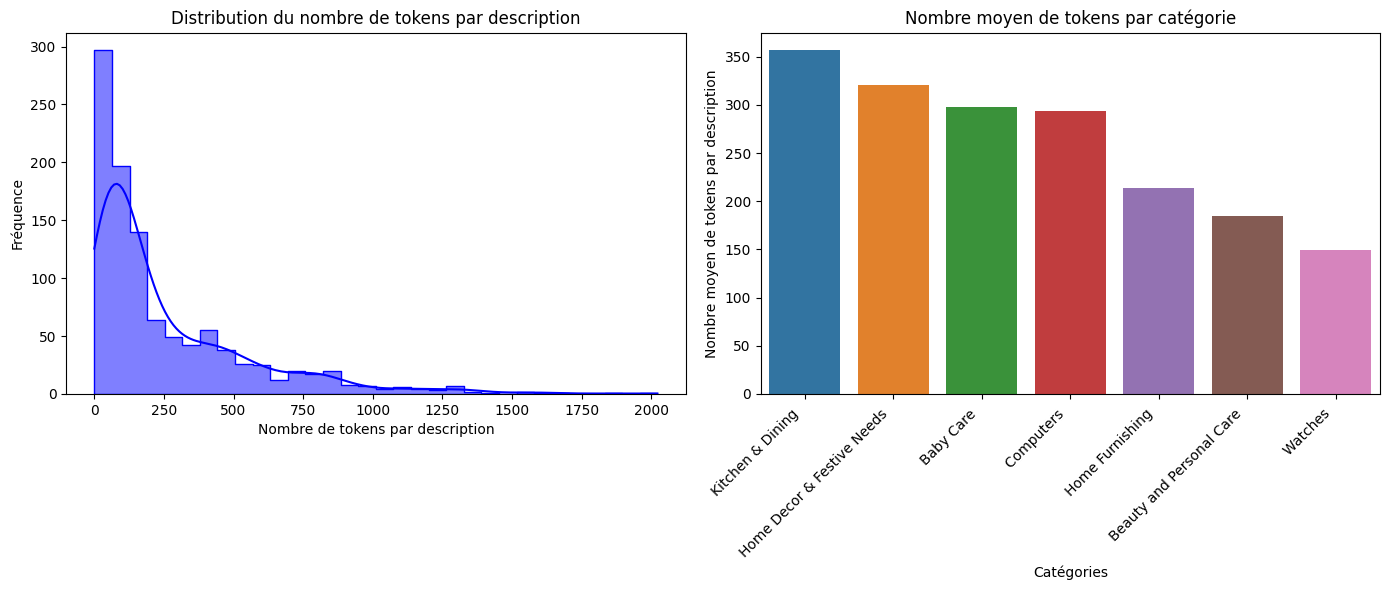

In [ ]:
# Nombre de tokens par description de produit
tmp = data['sentence_lem'].str.len()

# Calculer le nombre de tokens par description pour chaque catégorie
category_mean_len = data.groupby('Categ_A')['sentence_lem'].apply(lambda x: x.str.len().mean()).sort_values(ascending=False)

plt.figure(figsize=(14, 6))  # Augmenter la taille de la figure pour une meilleure lisibilité

# Figure 1 : Histogramme du nombre de tokens par description
plt.subplot(121)
sns.histplot(x=tmp, kde=True, element="step", color="blue")
plt.title("Distribution du nombre de tokens par description")
plt.xlabel("Nombre de tokens par description")
plt.ylabel("Fréquence")

# Figure 2 : Longueur des descriptions par catégorie
plt.subplot(122)
len_categ_plot = sns.barplot(x=category_mean_len.index, y=category_mean_len.values
                             , hue=category_mean_len.index, legend=False)
plt.ylabel("Nombre moyen de tokens par description")
plt.xlabel("Catégories")
plt.title("Nombre moyen de tokens par catégorie")
len_categ_plot.set_xticklabels(len_categ_plot.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show();


In [ ]:
data['sentence_lem'].str.len().groupby(data['Categ_A']).mean().sort_values(ascending = False)

,sentence_lem
Categ_A,
Kitchen & Dining,356.940000
Home Decor & Festive Needs,320.340000
Baby Care,298.073333
Computers,294.026667
Home Furnishing,213.933333
Beauty and Personal Care,185.033333
Watches,149.526667


### **Features engenering et clustering**

In [ ]:
# Initialisation d'une liste vide pour les résultats du clustering (modèle, reduction, ARI) :
ARI_results = np.empty(shape=[0, 3])

#### **L'approches de type bag-of-words**

##### **Comptage simple des mots : Count vectorizer**

On utilise le **CountVectorizer** pour convertir les phrases lemmatisées de la colonne **sentence_lem** en une matrice de comptage des mots. Cela permet de préparer le texte pour le **(KMEANS)**. Le vocabulaire est appris lors de l'appel à **fit()**, puis la transformation du texte en vecteurs de comptage est effectuée avec **transform()**.

In [ ]:
# Les hyperparametres : max_df = 0,95 (le mot present max 95%), min_df = 0,05 (5%),
# ngram_range=(1, 3) permet à l'algo de former des groupes de mots
cvect = CountVectorizer(stop_words='english')

feat = 'sentence_lem'
cv_fit = cvect.fit(data[feat])

cv_transform = cvect.transform(data[feat])

######**KMEANS**

In [ ]:
# On applique le clustering K-means sur les données vectorisées (cv_transform) et
# calcule l'Adjusted Rand Index (ARI) en comparant les clusters prédits avec les vraies catégories.
ARI, labels = kmeans_fct(cv_transform, data['Categ_A'])

# Mettre à jour ARI_results en ajoutant ces trois éléments (modele, reduction, valeur de ARI)
ARI_results = np.append(ARI_results, [["CV", "None", ARI]], axis=0)

ARI :  0.1421


Les résultats obtenus montrent que le clustering K-means appliqué ausx données donne un **ARI de 0.1421**. Ce score indique que le clustering a une faible corrélation avec les vraies catégories. Ce n'est pas un score exceptionnel, mais il montre que K-means a réussi à identifier certaines structures dans les données.

Pour la suite, nous allons utiliser des techniques de réduction de dimmesions, telle que **SVD** et **t-SNE**, pour avoir des clusters plus performant.

######**Réduction de dimensionnalité en 2D avec SVD**

Cela permet de réduire le nombre de features, tout en préservant les informations essentielles, facilitant ainsi l'application d'algorithmes de clustering sur les données réduites.

Nombre de dimensions avant TSVD: 3071
Nombre de dimensions aprés TSVD (99% var. expliquée): 538
ARI :  0.152


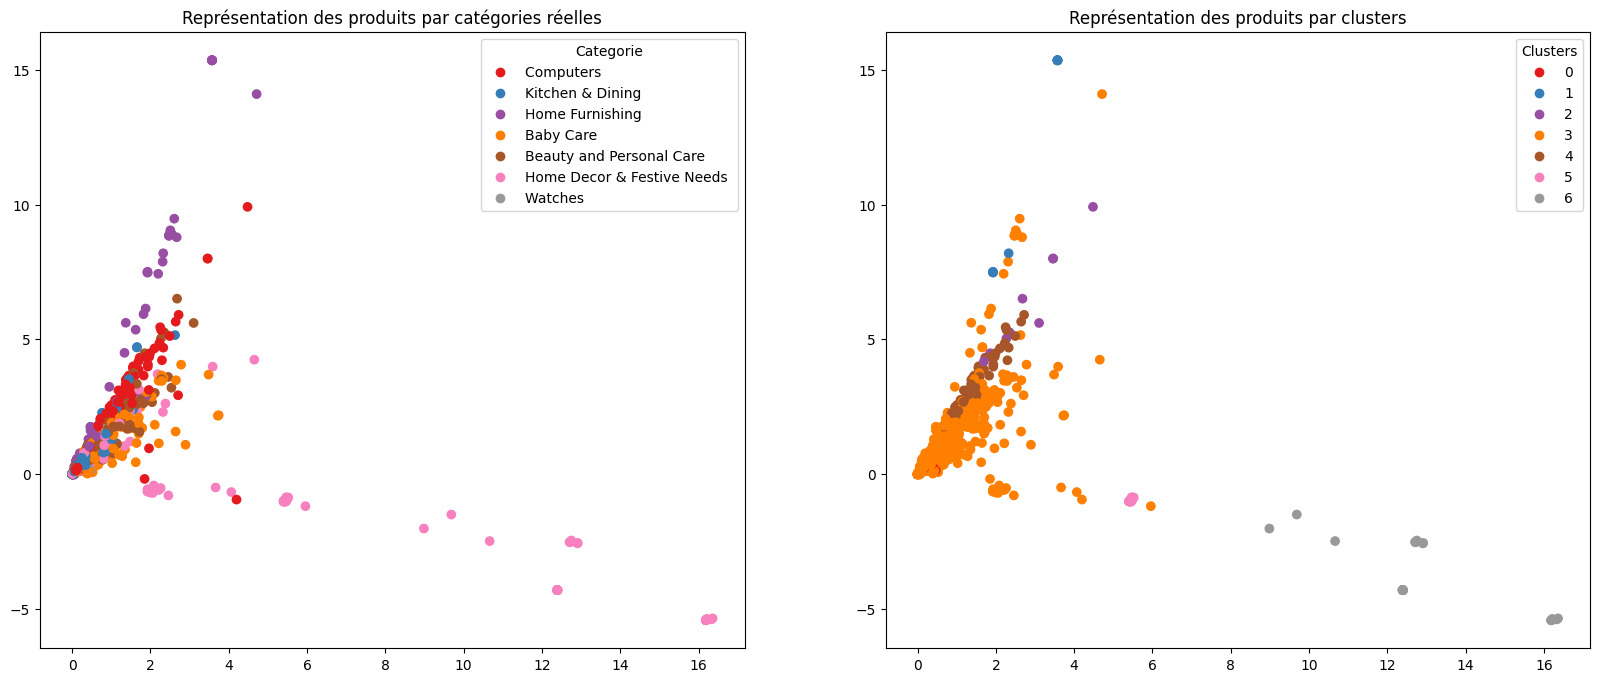

In [ ]:
X_reduc = reduction_fct(cv_transform, reduc='SVD')
ARI, labels = kmeans_fct(X_reduc, data['Categ_A'])
reduc_visu_fct(X_reduc, data['Categ_A'], labels)

ARI_results = np.append(ARI_results, [["CV", "SVD", ARI]], axis=0)

######**Réduction de dimensionnalité en 2D avec TSNE et clustering avec KMEANS**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI :  0.4073


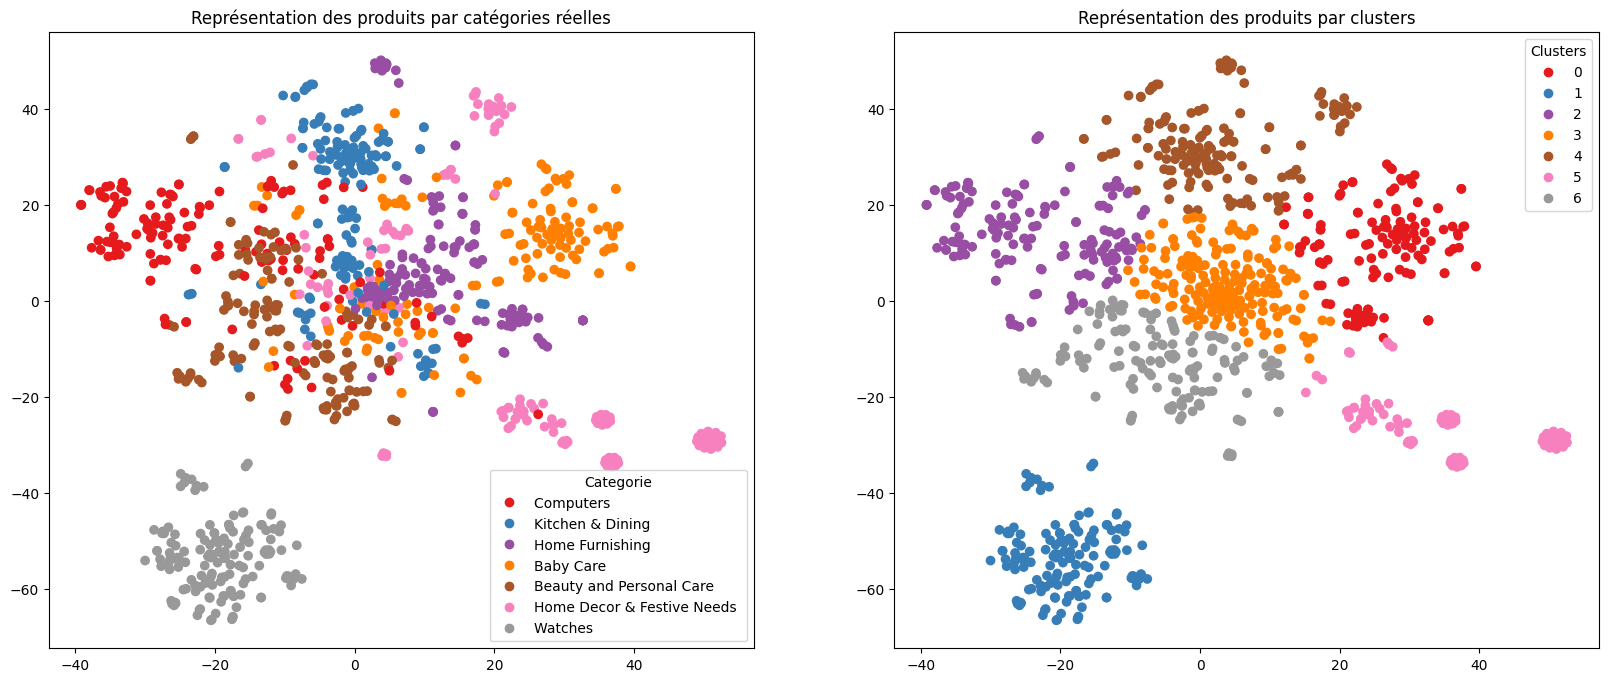

In [ ]:
# réduction de dimensionnalité TSNE sur les données vectorisées avec CountVectorizer,
# T-SNE (probaliste et instable, preserve les distances locales p/r à l'ACP plus globale) ajouter perpexity
X_reduc = reduction_fct(cv_transform, reduc='TSNE')
# On applique l'algorithme de K-means pour le clustering.
ARI, labels = kmeans_fct(X_reduc, data['Categ_A'])

# Visualisation et calcul de ARI pour mesurer la qualité du clustering
reduc_visu_fct(X_reduc, data['Categ_A'], labels)
ARI_results = np.append(ARI_results, [["CV", "TSNE", ARI]], axis=0)

######**Matrice de confusion CV**

In [ ]:
# Encodage des catégories en labels numériques
le = LabelEncoder()
vrai_labels = le.fit_transform(data['Categ_A'])
# la matrice de confusion
conf_mat = confusion_matrix(vrai_labels, labels)

[3 6 0 2 1 5 4]


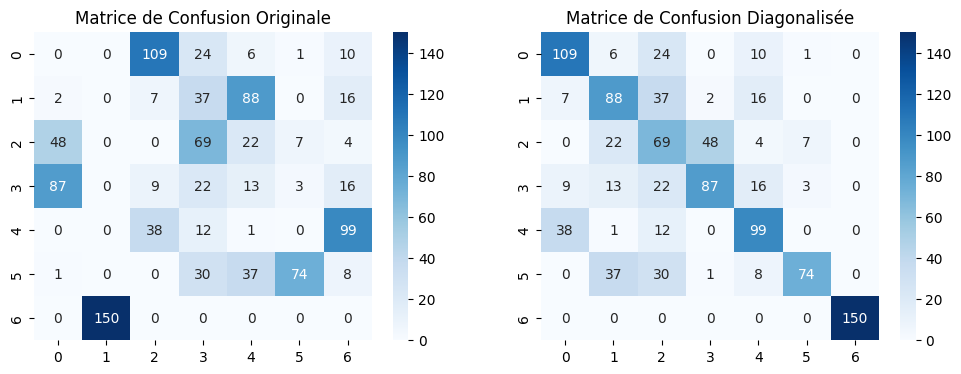

In [ ]:
# On transforme la matrice de confusion en dataframe
df_cm = pd.DataFrame(conf_mat, index = [i for i in "0123456"],
                  columns = [i for i in "0123456"])

# Obtenir les indices des valeurs maximales par colonne
indices_max_col = np.argmax(conf_mat, axis=0)
print(indices_max_col)
# Créer une matrice de confusion vide avec la même forme que l'originale
conf_mat_diagonalized = np.zeros_like(conf_mat)

# Réarranger les colonnes en fonction des indices max
for col in range(conf_mat.shape[1]):
    row = indices_max_col[col]
    conf_mat_diagonalized[:, row] += conf_mat[:, col]

# Créer un DataFrame pandas pour la matrice diagonalisée
df_cm_diagonalized = pd.DataFrame(conf_mat_diagonalized, index=[i for i in "0123456"],
                                   columns=[i for i in "0123456"])

# Créer une figure avec deux sous-graphiques côte à côte
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)  # Premier sous-graphique
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='d')
plt.title('Matrice de Confusion Originale')

plt.subplot(1, 2, 2)  # Deuxième sous-graphique
sns.heatmap(df_cm_diagonalized, annot=True, cmap="Blues", fmt='d')
plt.title('Matrice de Confusion Diagonalisée')

plt.show();

Les résultats obtenus montrent que le clustering K-means appliqué après la réduction de dimensionnalité via TSNE donne un **ARI de 0.4073** plus performnt que celui de **SVD (0.152)**. Ce score du **t-SNE** indique que le clustering a **une corrélation modérée avec les vraies catégories**.

 De plus, la vectorisation basée sur la **simple fréquence des mots** *(CountVectorizer)* pourrait être remplacée par des **méthodes plus sophistiquées, comme TF-IDF ou des embeddings de mots**, afin de mieux capturer les relations sémantiques entre les textes et améliorer la segmentation.

##### **Transformer des textes en vecteurs avec TF-IDF**


*  **TF** (Term Frequency) : Compte la fréquence d'apparition d'un terme dans **"sentence_lem"** (La variable lemmatisées) .

*  **IDF** (Inverse Document Frequency) : Pénalise les termes qui apparaissent trop fréquemment dans plusieurs documents, car ils sont généralement moins discriminants.

Le produit de TF et IDF permet de donner un poids plus élevé aux termes importants de "sentence_lem" et de réduire l'importance des mots communs.

In [ ]:
# paramètres : max_df=0.95, min_df=0.05, ngram_range=(1, 3)
ctf = TfidfVectorizer(stop_words='english')

feat = 'sentence_lem'
ctf_fit = ctf.fit(data[feat])

ctf_transform = ctf.transform(data[feat])

In [ ]:
# Clustering

ARI, labels = kmeans_fct(ctf_transform, data['Categ_A'])

ARI_results = np.append(ARI_results, [["TF-IDF", "None", ARI]], axis=0)

ARI :  0.2269


######**Réduire la dimensionnalité des vecteurs TF-IDF avec TSNE et SVD**

In [ ]:
# SVD
X_reduc = reduction_fct(ctf_transform, reduc='SVD')
ARI, labels = kmeans_fct(X_reduc, data['Categ_A'])
# reduc_visu_fct(X_reduc, data['Categ_A'], labels)

ARI_results = np.append(ARI_results, [["TF-IDF", "SVD", ARI]], axis=0)

Nombre de dimensions avant TSVD: 3071
Nombre de dimensions aprés TSVD (99% var. expliquée): 745
ARI :  0.2377


In [ ]:
# ARI_results = ARI_results[:-1]

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI :  0.5851


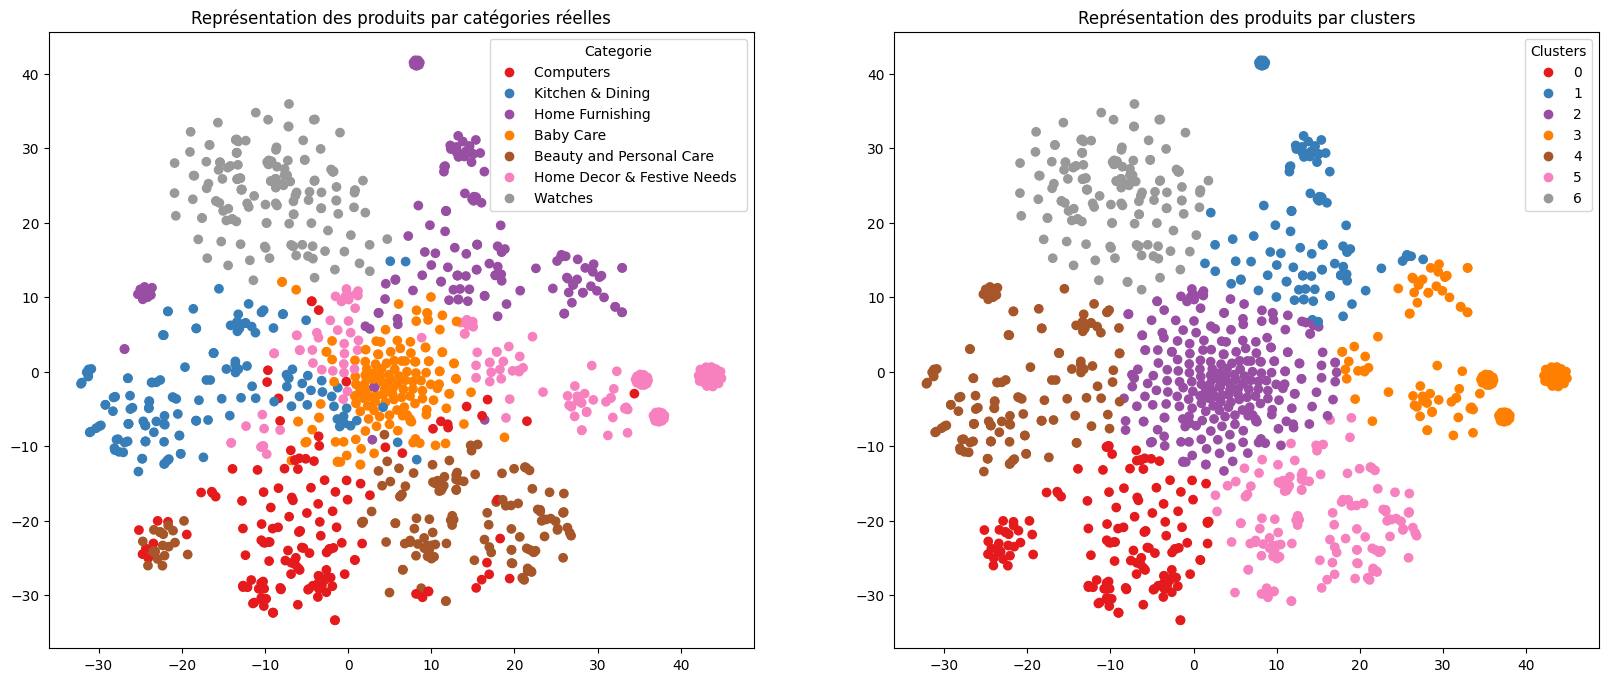

In [ ]:
# t-SNE
X_reduc = reduction_fct(ctf_transform, reduc='TSNE')
ARI, labels = kmeans_fct(X_reduc, data['Categ_A'])
reduc_visu_fct(X_reduc, data['Categ_A'], labels)

ARI_results = np.append(ARI_results, [["TF-IDF", "TSNE", ARI]], axis=0)

###### **Matrice de confusion TF-IDF**

In [ ]:
vrai_labels = le.fit_transform(data['Categ_A'])
# la matrice de confusion
conf_mat2 = confusion_matrix(vrai_labels, labels)

[0 2 3 5 1 4 6]


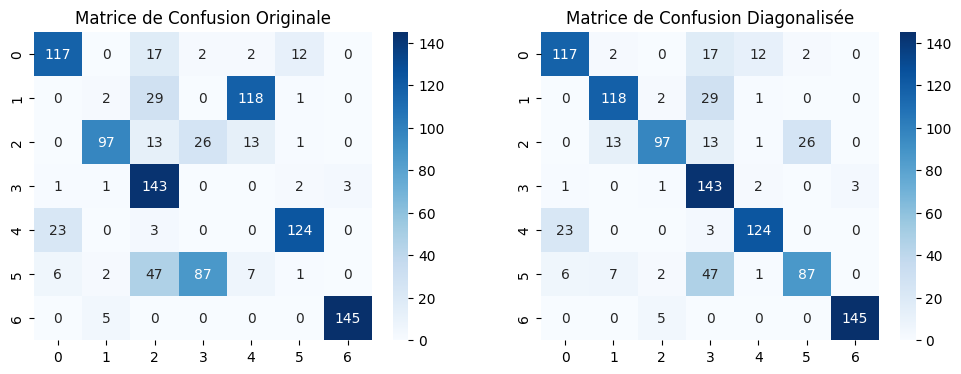

In [ ]:
# On transforme la matrice de confusion en dataframe
df_cm = pd.DataFrame(conf_mat2, index = [i for i in "0123456"],
                  columns = [i for i in "0123456"])

# Obtenir les indices des valeurs maximales par colonne
indices_max_col = np.argmax(conf_mat2, axis=0)
print(indices_max_col)
# Créer une matrice de confusion vide avec la même forme que l'originale
conf_mat_diagonalized = np.zeros_like(conf_mat2)

# Réarranger les colonnes en fonction des indices max
for col in range(conf_mat2.shape[1]):
    row = indices_max_col[col]
    conf_mat_diagonalized[:, row] += conf_mat2[:, col]

# Créer un DataFrame pandas pour la matrice diagonalisée
df_cm_diagonalized = pd.DataFrame(conf_mat_diagonalized, index=[i for i in "0123456"],
                                   columns=[i for i in "0123456"])

# Créer une figure avec deux sous-graphiques côte à côte
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)  # Premier sous-graphique
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='d')
plt.title('Matrice de Confusion Originale')

plt.subplot(1, 2, 2)  # Deuxième sous-graphique
sns.heatmap(df_cm_diagonalized, annot=True, cmap="Blues", fmt='d')
plt.title('Matrice de Confusion Diagonalisée')

plt.show();

Les résultats obtenus montrent que le clustering K-means appliqué après la réduction de dimensionnalité via TSNE donne un **ARI de 0.5851**. Ce score indique que la similarité entre les clusters prédits et les vraies catégories est **modérée à forte**. L'utilisation de TF-IDF pour la vectorisation des descriptions de produits a clairement amélioré les résultats par rapport à une approche basée sur la simple fréquence des mots, telle que CountVectorizer.

#### **Word Embedding avec Word2Vec**

In [ ]:
import tensorflow as tf      # Construire et entraîner des réseaux neuronaux

import tensorflow.keras      # Simplifie la construction des modèles et l'entraînement
from tensorflow.keras import backend as K # Accéder aux fonctions TensorFlow via une abstraction.

from tensorflow.keras.preprocessing.text import Tokenizer # Tokenisation des textes pour les modèles NLP
# Normalisation des séquences de données textuelles avant leur entrée dans un modèle
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Suivi des performances du modèle
from tensorflow.keras import metrics as kmetrics

from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Manipuler Word2Vec (vectorisation de texte)
import gensim


In [ ]:
# Longueur de la plus longue phrase lemmatisée
data['sentence_lem'].str.len().max()

2022

In [ ]:
# Préparation des phrases
sentences = data['sentence_lem'].to_list()

# On nettoie la liste(convertit en minuscules, enlève la ponctuation)
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

##### **CBOW (Continuous Bag-of-Words)**

Cette algorithme va nous permettre de  prédire un mot cible à partir des mots de contexte qui l'entourent.

In [ ]:
# Création et entraînement du modèle Word2Vec

# les Hyper-paramètres du modèle
w2v_size = 1200
w2v_window = 5
w2v_min_count = 1
w2v_epochs = 100
# On adapte la longueur maximale des séquences d'entrée pour un modèle
maxlen = data['sentence_lem'].str.len().max()

print("Construction et entraiment du modèle Word2Vec ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count,
                                   window=w2v_window,
                                   vector_size=w2v_size,
                                   sg=0,  # CBOW
                                   seed=42,
                                   workers=6)

w2v_model.build_vocab(sentences)
w2v_model.train(
    sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec entrainé")

Construction et entraiment du modèle Word2Vec ...
Vocabulary size: 3161
Word2Vec entrainé


######**Préparation des sentences**

In [ ]:
# tokenization

print("Appliquer Tokenizer ...")
# Convertir "sentences" en séquences d'entiers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# On Ajuste les séquences à une longueur uniforme
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                            maxlen=maxlen,
                            padding='post')

# On calcule le nombre total de mots uniques présents dans les phrases
num_words = len(tokenizer.word_index) + 1
print("Nombre de mots unique: %i" % num_words)

Appliquer Tokenizer ...
Nombre de mots unique: 3162


######**Création de la matrice d'embedding**

On crée une matrice d'embedding où chaque ligne correspond à un vecteur d'embedding pour un mot du vocabulaire. Si un mot a un vecteur d'embedding dans le modèle Word2Vec, il est ajouté dans la matrice ; sinon, cette ligne reste remplie de zéros.

Le taux d'embedding indique combien de mots du vocabulaire ont été trouvés dans le modèle Word2Vec.

In [ ]:
print("Création de la matrice d'embedding ...")
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i = 0
j = 0

for word, idx in word_index.items():
    i += 1
    if word in w2v_words:
        j += 1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]

word_rate = np.round(j/i, 4)
print("Word embedding rate : ", word_rate)
print("Matrice d'embedding: %s" % str(embedding_matrix.shape))

Création de la matrice d'embedding ...
Word embedding rate :  1.0
Matrice d'embedding: (3162, 1200)


Avec un **Word embedding rate de 1.0**, cela signifie que le modèle d'embedding **Word2Vec** couvre complètement tous les mots.

**Il y a 3162 mots uniques et chaque mot est représenté par un vecteur de 1200 dimensions**.

######**Création du modèle d'embedding**

Il sera utilisé dans cette étape le traitement du (NLP) où les embeddings de mots et leur représentation agrégée sont nécessaires.

In [ ]:
input = Input(shape=(len(x_sentences), maxlen), dtype='float64')

word_input = Input(shape=(maxlen,), dtype='float64')

word_embedding = Embedding(input_dim=vocab_size,
                           output_dim=w2v_size,
                           weights=[embedding_matrix],
                           input_length=maxlen)(word_input)

word_vec = GlobalAveragePooling1D()(word_embedding)

embed_model = Model([word_input], word_vec)
embed_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 2022)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 2022, 1200)          │       3,794,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 1200)                │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,794,400 (14.47 MB)

 Trainable params: 3,794,400 (14.47 MB)

 Non-trainable params: 0 (0.00 B)

**Création des features par description du corpus**

In [ ]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

 7/33 ━━━━━━━━━━━━━━━━━━━━ 7s 279ms/step

**Le nombre total de phrases est de 1050 et chacune d'elle est représentée par un vecteur de taille 1200.**

###### **KMEANS**

In [ ]:
ARI, labels = kmeans_fct(embeddings, data['Categ_A'])

ARI_results = np.append(ARI_results, [["Word2Vec(CBOW)","None", ARI]], axis=0)

**Le ARI (0.17) indique une faible de similiraité entre les clusters.**

###### **T-SNE Vs SVD d'embedindgs**

In [ ]:
# On appelle la fonction reduction avec SVD
X_reduc = reduction_fct(embeddings, reduc='SVD')
# On recupère le ARI et les lables des clusters
ARI, labels = kmeans_fct(X_reduc, data['Categ_A'])

# On enregistre le resultat dans np aray
ARI_results = np.append(ARI_results, [["Word2Vec(CBOW)", "SVD", ARI]], axis=0)

In [ ]:
# On appelle la fonction reduction avec la méthode t-sne
X_reduc = reduction_fct(embeddings, reduc='TSNE')
# On recupère le ARI et les lables des clusters
ARI, labels = kmeans_fct(X_reduc, data['Categ_A'])
# Visualiser les clusters
reduc_visu_fct(X_reduc, data['Categ_A'], labels, )

#
ARI_results = np.append(ARI_results, [["Word2Vec(CBOW)", "TSNE", ARI]], axis=0)

**Le T-SNE a une performance raisonnable 54%** pour la reduction de dimmension et la visualisation des données mieux que le **SVD**. Cependant, il pourrait y avoir une amélioration possibles pour aligner les clusters avec les veritables structures des données.

###### **Matrice de confusion embeddings**

In [ ]:
vrai_labels = le.fit_transform(data['Categ_A'])
# la matrice de confusion
conf_mat3 = confusion_matrix(vrai_labels, labels)

In [ ]:
# On transforme la matrice de confusion en dataframe
df_cm = pd.DataFrame(conf_mat3, index = [i for i in "0123456"],
                  columns = [i for i in "0123456"])

# Obtenir les indices des valeurs maximales par colonne
indices_max_col = np.argmax(conf_mat3, axis=0)
print(indices_max_col)
# Créer une matrice de confusion vide avec la même forme que l'originale
conf_mat_diagonalized = np.zeros_like(conf_mat3)

# Réarranger les colonnes en fonction des indices max
for col in range(conf_mat3.shape[1]):
    row = indices_max_col[col]
    conf_mat_diagonalized[:, row] += conf_mat3[:, col]

# Créer un DataFrame pandas pour la matrice diagonalisée
df_cm_diagonalized = pd.DataFrame(conf_mat_diagonalized, index=[i for i in "0123456"],
                                   columns=[i for i in "0123456"])

# Créer une figure avec deux sous-graphiques côte à côte
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)  # Premier sous-graphique
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='d')
plt.title('Matrice de Confusion Originale')

plt.subplot(1, 2, 2)  # Deuxième sous-graphique
sns.heatmap(df_cm_diagonalized, annot=True, cmap="Blues", fmt='d')
plt.title('Matrice de Confusion Diagonalisée')

plt.show();

##### **Ski-gram**

Dans cette partie, nous allons construire un modèle de deep learning qui utilise **Word2Vec** pré-entraîné pour obtenir les embeddings des phrases.

###### **Construction & entrainement de modèle**

In [ ]:
# Création et entraînement du modèle Word2Vec
print("Construction & entrainement de modèle Word2Vec ...")
w2v_model = gensim.models.Word2Vec(min_count = w2v_min_count,
                                   window = w2v_window,
                                   vector_size = w2v_size,
                                   sg = 1,  # "skip-gram"
                                   seed = 42,
                                   workers = 4)

# On construit le vocabulaire à partir de sentense puis entraîne le modèle Word2Vec
w2v_model.build_vocab(sentences)
w2v_model.train(
    sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Taille du vocabulaire: %i" % len(w2v_words))
print("Word2Vec entrainé")

# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                            maxlen=maxlen,
                            padding='post')

num_words = len(tokenizer.word_index) + 1
print("Nombre de mots unique: %i" % num_words)

# Création de la matrice d'embedding
print("Création de la matrice d'embedding ...")
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

embedding_matrix = np.zeros((vocab_size, w2v_size))
i = 0
j = 0

for word, idx in word_index.items():
    i += 1
    if word in w2v_words:
        j += 1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]

word_rate = np.round(j/i, 4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))
# Création du modèle

input = Input(shape=(len(x_sentences), maxlen), dtype='float64')
word_input = Input(shape=(maxlen,), dtype='float64')
word_embedding = Embedding(input_dim=vocab_size,
                           output_dim=w2v_size,
                           weights=[embedding_matrix],
                           input_length=maxlen)(word_input)
word_vec = GlobalAveragePooling1D()(word_embedding)

# Résumé du modèle et génération des embeddings
embed_model = Model([word_input], word_vec)
embed_model.summary()
embeddings = embed_model.predict(x_sentences)
embeddings.shape

Construction & entrainement de modèle Word2Vec ...
Taille du vocabulaire: 3161
Word2Vec entrainé
Fit Tokenizer ...
Nombre de mots unique: 3162
Création de la matrice d'embedding ...
Word embedding rate :  1.0
Embedding matrix: (3162, 1200)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 2022)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 2022, 1200)          │       3,794,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 1200)                │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,794,400 (14.47 MB)

 Trainable params: 3,794,400 (14.47 MB)

 Non-trainable params: 0 (0.00 B)

33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 318ms/step


(1050, 1200)

**On applique KMeans sur des embeddings Word2Vec, puis évalue la qualité du clustering à l'aide de l'ARI.**

In [ ]:
ARI, labels = kmeans_fct(embeddings, data['Categ_A'])

ARI_results = np.append(ARI_results, [["Word2Vec(SG)", "None", ARI]], axis=0)

ARI :  0.0393


###### **Réduction de dimension avec t-SNE et SVD**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI :  0.3406


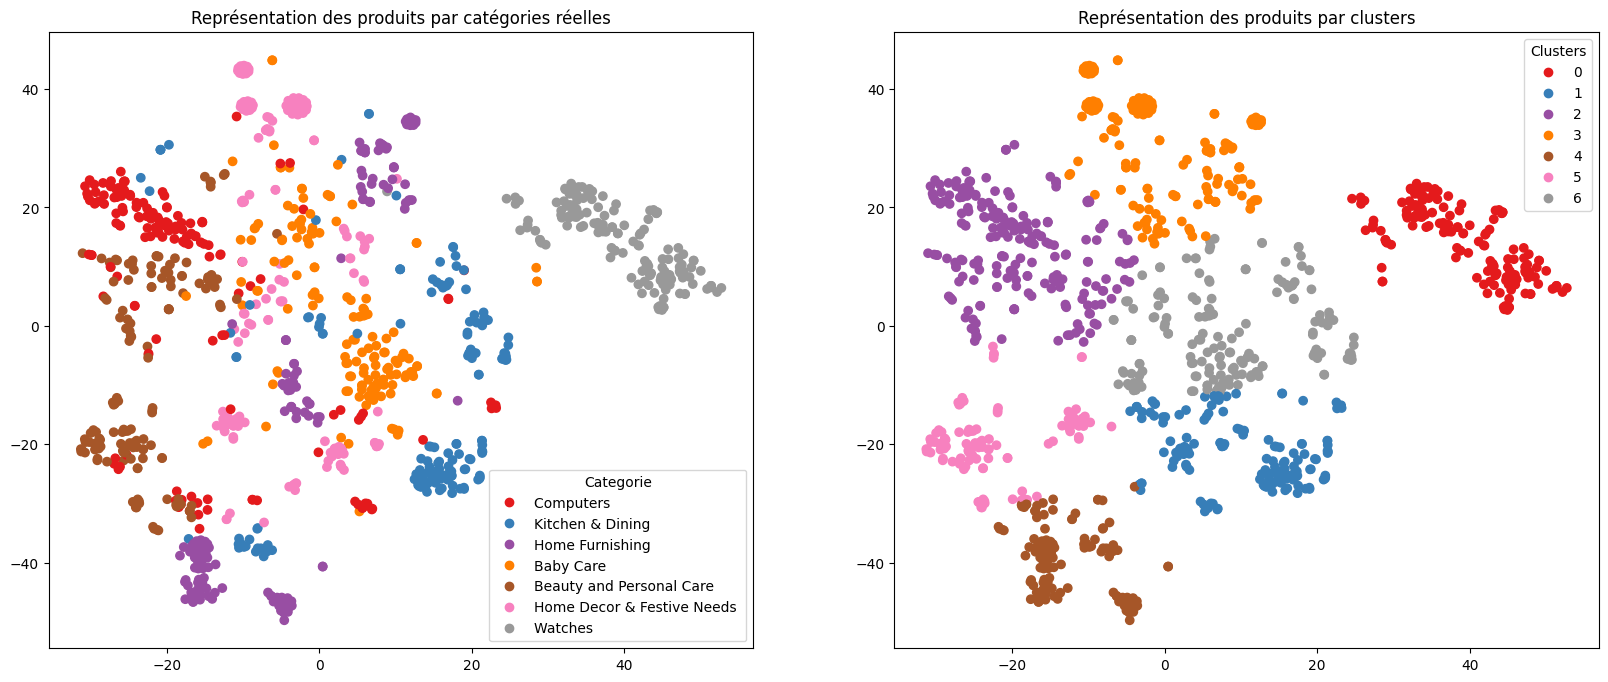

In [ ]:
X_reduc = reduction_fct(embeddings, reduc='TSNE')
ARI, labels = kmeans_fct(X_reduc, data['Categ_A'])
reduc_visu_fct(X_reduc, data['Categ_A'], labels)

ARI_results = np.append(ARI_results, [["Word2Vec(SG)", "TSNE", ARI]], axis=0)

In [ ]:
# SVD
X_reduc = reduction_fct(embeddings, reduc='SVD')
ARI, labels = kmeans_fct(X_reduc, data['Categ_A'])
# reduc_visu_fct(X_reduc, data['Categ_A'], labels)

ARI_results = np.append(ARI_results, [["Word2Vec(SG)", "SVD", ARI]], axis=0)

#### **Word Embedding avec FastText**

#####**CBOW**

In [ ]:
# Création et entraînement du modèle FastText
FT_size = 600
print("Construction & entrainement de modèle FastText ...")
FT_model = gensim.models.FastText(min_count=w2v_min_count, window=w2v_window,
                                  vector_size=FT_size,
                                  seed=42,
                                  sg=0,
                                  workers=4)

FT_model.build_vocab(sentences)
FT_model.train(sentences, total_examples=FT_model.corpus_count,
               epochs=w2v_epochs)
model_vectors = FT_model.wv
FT_words = model_vectors.index_to_key
print("Taille du ocabulaire: %i" % len(FT_words))
print("FastText entrainé")

Construction & entrainement de modèle FastText ...
Taille du ocabulaire: 3161
FastText entrainé


In [ ]:
print("Create Embedding matrix ...")

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, FT_size))
i = 0
j = 0

for word, idx in word_index.items():
    i += 1
    if word in FT_words:
        j += 1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]

word_rate = np.round(j/i, 4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

In [ ]:
# Création du modèle
input = Input(shape=(len(x_sentences), maxlen), dtype='float64')
word_input = Input(shape=(maxlen,), dtype='float64')
word_embedding = Embedding(input_dim=vocab_size,
                           output_dim=FT_size,
                           weights=[embedding_matrix],
                           input_length=maxlen)(word_input)
word_vec = GlobalAveragePooling1D()(word_embedding)
embed_model = Model([word_input], word_vec)

embed_model.summary()

######**Kmeans et reduction de dimmension**

In [ ]:
# Sans reduction de dim
ARI, labels = kmeans_fct(embeddings, data['Categ_A'])

ARI_results = np.append(ARI_results, [["FastText(CBOW)", "None", ARI]], axis=0)

In [ ]:
# t-SNE
X_reduc = reduction_fct(embeddings, reduc='TSNE')
ARI, labels = kmeans_fct(X_reduc, data['Categ_A'])
reduc_visu_fct(X_reduc, data['Categ_A'], labels, )

ARI_results = np.append(ARI_results, [["FastText(CBOW)", "TSNE", ARI]], axis=0)

In [ ]:
# SVD
X_reduc = reduction_fct(embeddings, reduc='SVD')
ARI, labels = kmeans_fct(X_reduc, data['Categ_A'])
# reduc_visu_fct(X_reduc, data['Categ_A'], labels, )

ARI_results = np.append(ARI_results, [["FastText(CBOW)", "SVD", ARI]], axis=0)

Nombre de dimensions avant TSVD: 1200
Nombre de dimensions aprés TSVD (99% var. expliquée): 79
ARI :  0.0411


######**Matrice de confusion**

In [ ]:
# la matrice de confusion
conf_mat5 = confusion_matrix(vrai_labels, labels)

In [ ]:
# On transforme la matrice de confusion en dataframe
df_cm = pd.DataFrame(conf_mat5, index = [i for i in "0123456"],
                  columns = [i for i in "0123456"])

# Obtenir les indices des valeurs maximales par colonne
indices_max_col = np.argmax(conf_mat5, axis=0)
print(indices_max_col)
# Créer une matrice de confusion vide avec la même forme que l'originale
conf_mat_diagonalized = np.zeros_like(conf_mat5)

# Réarranger les colonnes en fonction des indices max
for col in range(conf_mat5.shape[1]):
    row = indices_max_col[col]
    conf_mat_diagonalized[:, row] += conf_mat5[:, col]

# Créer un DataFrame pandas pour la matrice diagonalisée
df_cm_diagonalized = pd.DataFrame(conf_mat_diagonalized, index=[i for i in "0123456"],
                                   columns=[i for i in "0123456"])

# Créer une figure avec deux sous-graphiques côte à côte
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)  # Premier sous-graphique
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='d')
plt.title('Matrice de Confusion Originale')

plt.subplot(1, 2, 2)  # Deuxième sous-graphique
sns.heatmap(df_cm_diagonalized, annot=True, cmap="Blues", fmt='d')
plt.title('Matrice de Confusion Diagonalisée')

plt.show();

####**Skip-Gram**

In [ ]:
# Création et entraînement du modèle FastText
FT_size = 600

print("Construction & entrainement de modèle FastText ...")
FT_model = gensim.models.FastText(min_count=w2v_min_count, window=w2v_window,
                                  vector_size=FT_size,
                                  seed=42,
                                  sg=1,
                                  workers=4)

FT_model.build_vocab(sentences)
FT_model.train(sentences, total_examples=FT_model.corpus_count,
               epochs=w2v_epochs)
model_vectors = FT_model.wv
FT_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(FT_words))
print("FastText trained")


print("Create Embedding matrix ...")
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, FT_size))
i = 0
j = 0

for word, idx in word_index.items():
    i += 1
    if word in FT_words:
        j += 1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]

word_rate = np.round(j/i, 4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))
# Création du modèle

input = Input(shape=(len(x_sentences), maxlen), dtype='float64')
word_input = Input(shape=(maxlen,), dtype='float64')
word_embedding = Embedding(input_dim=vocab_size,
                           output_dim=FT_size,
                           weights=[embedding_matrix],
                           input_length=maxlen)(word_input)
word_vec = GlobalAveragePooling1D()(word_embedding)
embed_model = Model([word_input], word_vec)

embed_model.summary()
embeddings = embed_model.predict(x_sentences)
embeddings.shape

In [ ]:
ARI, labels = kmeans_fct(embeddings, data['Categ_A'])

ARI_results = np.append(ARI_results, [["FastText(SG)", "None", ARI]], axis=0)

######**Reduction de dimmension avec t-SNE et SVD**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI :  0.3286


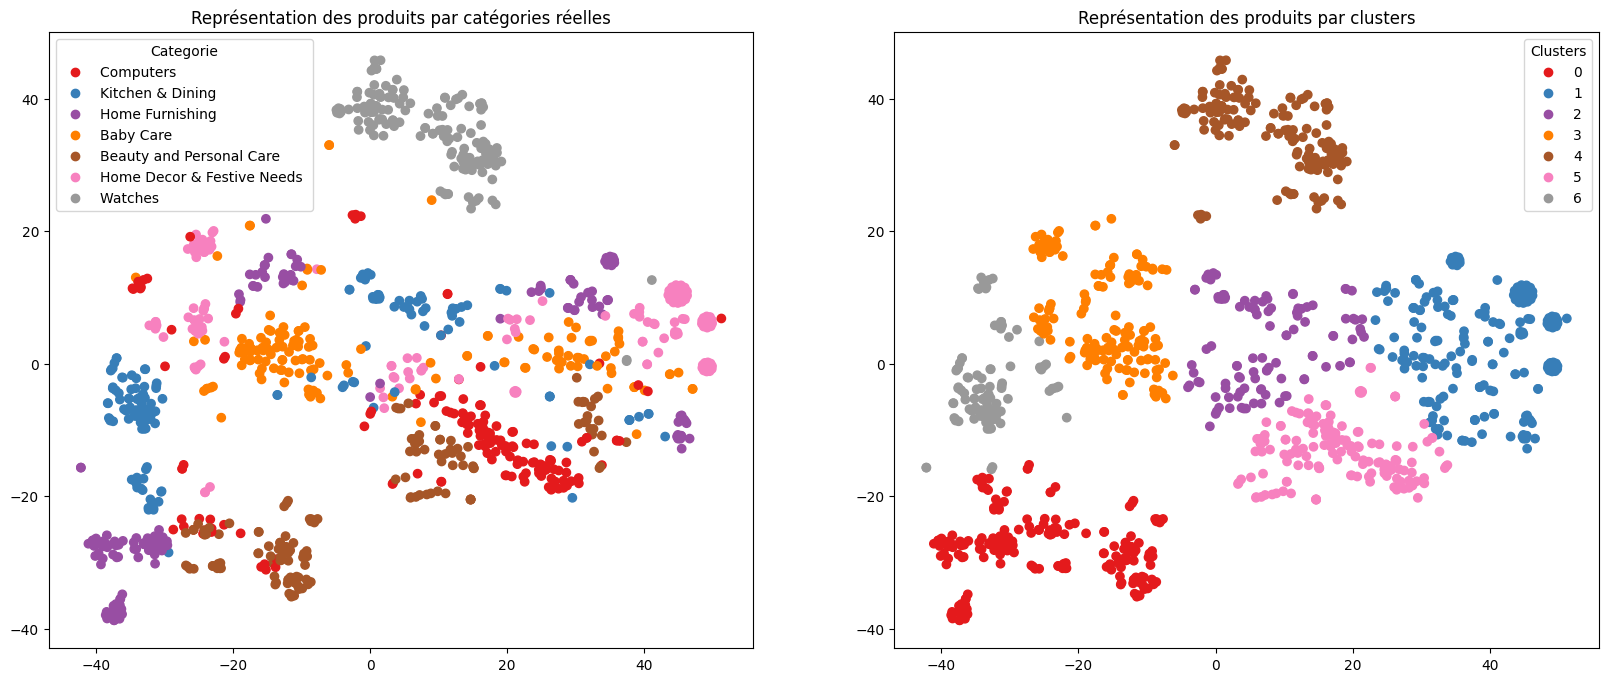

In [ ]:
# t-SNE
X_reduc = reduction_fct(embeddings, reduc='TSNE')
ARI, labels = kmeans_fct(X_reduc, data['Categ_A'])
reduc_visu_fct(X_reduc, data['Categ_A'], labels, )

ARI_results = np.append(ARI_results, [["FastText(SG)", "TSNE", ARI]], axis=0)

In [ ]:
# SVD
X_reduc = reduction_fct(embeddings, reduc='SVD')
ARI, labels = kmeans_fct(X_reduc, data['Categ_A'])
# reduc_visu_fct(X_reduc, data['Categ_A'], labels, )

ARI_results = np.append(ARI_results, [["FastText(SG)", "SVD", ARI]], axis=0)

######**Matrice de confusion**

In [ ]:
# la matrice de confusion
conf_mat6 = confusion_matrix(vrai_labels, labels)

In [ ]:
# On transforme la matrice de confusion en dataframe
df_cm = pd.DataFrame(conf_mat6, index = [i for i in "0123456"],
                  columns = [i for i in "0123456"])

# Obtenir les indices des valeurs maximales par colonne
indices_max_col = np.argmax(conf_mat6, axis=0)
print(indices_max_col)
# Créer une matrice de confusion vide avec la même forme que l'originale
conf_mat_diagonalized = np.zeros_like(conf_mat6)

# Réarranger les colonnes en fonction des indices max
for col in range(conf_mat6.shape[1]):
    row = indices_max_col[col]
    conf_mat_diagonalized[:, row] += conf_mat6[:, col]

# Créer un DataFrame pandas pour la matrice diagonalisée
df_cm_diagonalized = pd.DataFrame(conf_mat_diagonalized, index=[i for i in "0123456"],
                                   columns=[i for i in "0123456"])

# Créer une figure avec deux sous-graphiques côte à côte
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)  # Premier sous-graphique
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='d')
plt.title('Matrice de Confusion Originale')

plt.subplot(1, 2, 2)  # Deuxième sous-graphique
sns.heatmap(df_cm_diagonalized, annot=True, cmap="Blues", fmt='d')
plt.title('Matrice de Confusion Diagonalisée')

plt.show();

#### **Word Embedding avec BERT**

In [ ]:
from transformers import TFAutoModel, TFBertModel, AutoTokenizer

######**Entrainement du modèle**

In [ ]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data['sentence_lem'].to_list()

In [ ]:
model.summary()

######**BERT avec Hugging Face**

In [ ]:
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences,
                                                         max_length, batch_size, mode='HF')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
100%|██████████| 105/105 [04:09<00:00,  2.37s/it]

temps traitement :  249.0


######**Reduction de dimmension**

In [ ]:
# Sans
ARI, labels = kmeans_fct(features_bert, data['Categ_A'])

ARI_results = np.append(ARI_results, [["BERT(HuggingFace)", "None", ARI]], axis=0)

In [ ]:
# SVD
X_reduc_SVD = reduction_fct(features_bert, reduc='SVD')
ARI, labels = kmeans_fct(X_reduc_SVD, data['Categ_A'])
# reduc_visu_fct(X_reduc_SVD, data['Categ_A'], labels)

ARI_results = np.append(ARI_results, [["BERT(HuggingFace)", "SVD", ARI]], axis=0)

In [ ]:
# t-SNE
X_reduc_TSNE = reduction_fct(features_bert, reduc='TSNE')
ARI, labels = kmeans_fct(X_reduc_TSNE, data['Categ_A'])
reduc_visu_fct(X_reduc_TSNE, data['Categ_A'], labels)

ARI_results = np.append(ARI_results, [["BERT(HuggingFace)", "TSNE", ARI]], axis=0)

####**Word/sentence embedding avec USE (Universal Sentence Encoder)**



In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
sentences = data['sentence_lem'].to_list()
features_USE = feature_USE_fct(sentences, batch_size)

######**Reduction de dimmension**

In [ ]:
ARI, labels = kmeans_fct(features_USE, data['Categ_A'])

ARI_results = np.append(ARI_results, [["USE", "None", ARI]], axis=0)

In [ ]:
# SVD
X_reduc = reduction_fct(features_USE, reduc='SVD')
ARI, labels = kmeans_fct(X_reduc, data['Categ_A'])

ARI_results = np.append(ARI_results, [["USE", "SVD", ARI]], axis=0)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ARI :  0.4421


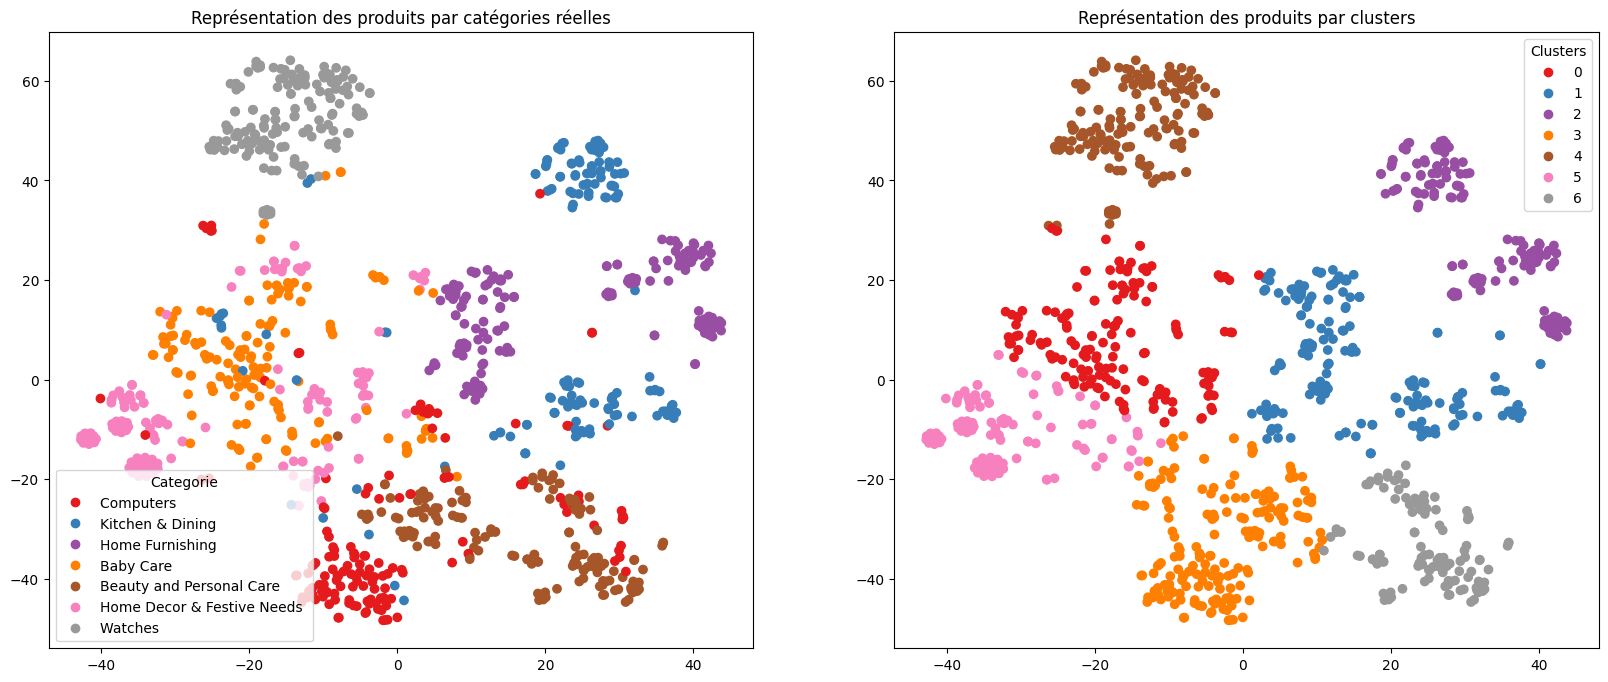

In [ ]:
# t-SNE
X_reduc = reduction_fct(features_USE, reduc='TSNE')
ARI, labels = kmeans_fct(X_reduc, data['Categ_A'])
reduc_visu_fct(X_reduc, data['Categ_A'], labels, )

ARI_results = np.append(ARI_results, [["USE", "TSNE", ARI]], axis=0)

######**Matrice de confusion**

In [ ]:
# la matrice de confusion
conf_mat7 = confusion_matrix(vrai_labels, labels)

In [ ]:
# On transforme la matrice de confusion en dataframe
df_cm = pd.DataFrame(conf_mat7, index = [i for i in "0123456"],
                  columns = [i for i in "0123456"])

# Obtenir les indices des valeurs maximales par colonne
indices_max_col = np.argmax(conf_mat7, axis=0)
print(indices_max_col)
# Créer une matrice de confusion vide avec la même forme que l'originale
conf_mat_diagonalized = np.zeros_like(conf_mat7)

# Réarranger les colonnes en fonction des indices max
for col in range(conf_mat7.shape[1]):
    row = indices_max_col[col]
    conf_mat_diagonalized[:, row] += conf_mat7[:, col]

# Créer un DataFrame pandas pour la matrice diagonalisée
df_cm_diagonalized = pd.DataFrame(conf_mat_diagonalized, index=[i for i in "0123456"],
                                   columns=[i for i in "0123456"])

# Créer une figure avec deux sous-graphiques côte à côte
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)  # Premier sous-graphique
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='d')
plt.title('Matrice de Confusion Originale')

plt.subplot(1, 2, 2)  # Deuxième sous-graphique
sns.heatmap(df_cm_diagonalized, annot=True, cmap="Blues", fmt='d')
plt.title('Matrice de Confusion Diagonalisée')

plt.show();

#####**Matrice de confusion V2 de USE**

In [ ]:
# # On transforme la matrice de confusion en dataframe
# df_cm = pd.DataFrame(conf_mat7, index = [i for i in "0123456"],
#                   columns = [i for i in "0123456"])

# # Obtenir les indices des valeurs maximales par colonne
# # indices_max_col = np.argmax(conf_mat7, axis=0)
# # [3 2 2 0 6 5 4]
# indices_max_col = np.array([3, 2, 1, 0, 6, 5, 4])
# print(indices_max_col)
# # Créer une matrice de confusion vide avec la même forme que l'originale
# conf_mat_diagonalized = np.zeros_like(conf_mat7)

# # Réarranger les colonnes en fonction des indices max
# for col in range(conf_mat7.shape[1]):
#     row = indices_max_col[col]
#     conf_mat_diagonalized[:, row] += conf_mat7[:, col]

# # Créer un DataFrame pandas pour la matrice diagonalisée
# df_cm_diagonalized = pd.DataFrame(conf_mat_diagonalized, index=[i for i in "0123456"],
#                                    columns=[i for i in "0123456"])

# # Créer une figure avec deux sous-graphiques côte à côte
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)  # Premier sous-graphique
# sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='d')
# plt.title('Matrice de Confusion Originale')

# plt.subplot(1, 2, 2)  # Deuxième sous-graphique
# sns.heatmap(df_cm_diagonalized, annot=True, cmap="Blues", fmt='d')
# plt.title('Matrice de Confusion Diagonalisée')

# plt.show();

####**Sentence embedding : Sentence-BERT**

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')

sentences = data['sentence_lem'].to_list()

embeddings = model.encode(sentences)

In [ ]:
ARI, labels = kmeans_fct(embeddings, data['Categ_A'])

ARI_results = np.append(ARI_results, [["SBERT", "None", ARI]], axis=0)


In [ ]:
X_reduc = reduction_fct(embeddings, reduc='SVD')
ARI, labels = kmeans_fct(X_reduc, data['Categ_A'])
reduc_visu_fct(X_reduc, data['Categ_A'], labels, )

ARI_results = np.append(ARI_results, [["SBERT", "SVD", ARI]], axis=0)

In [ ]:
X_reduc = reduction_fct(embeddings, reduc='TSNE')
ARI, labels = kmeans_fct(X_reduc, data['Categ_A'])
reduc_visu_fct(X_reduc, data['Categ_A'], labels, )

ARI_results = np.append(ARI_results, [["SBERT", "TSNE", ARI]], axis=0)

#### **Synthèse des modéles**

In [ ]:
# Création d'un DF
df_ARI_results = pd.DataFrame(ARI_results, columns=["Modèles", "Reduction", "ARI"])
df_ARI_results['ARI'] = df_ARI_results['ARI'].astype(float)

In [ ]:
# Visualisation
import plotly.express as px
plt.figure(figsize=(6, 6))
fig = px.bar(
    df_ARI_results,
    x="Modèles",
    y="ARI",
    color="Reduction",
    barmode="group",
    title="Le score de ARI par modèles et technique de réduction de dimension"
)

# Personnalisation de l'affichage
fig.update_layout(
    xaxis_title="Modèles",
    yaxis_title="ARI",
    legend_title_text="Dimension Reduction",
    xaxis_tickangle=-45
)

# Affichage
fig.show();

<Figure size 600x600 with 0 Axes>